#House price prediction (Delhi)

In [1]:
import numpy as np
import pandas as pd 


In [52]:
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns

In [79]:
House_data = pd.read_csv("MagicBricks.csv")

In [80]:
House_data.head()

,Area,BHK,Bathroom,Furnishing,Locality,Parking,Price,Status,Transaction,Type,Per_Sqft
0,800.0,3,2.0,Semi-Furnished,Rohini Sector 25,1.0,6500000,Ready_to_move,New_Property,Builder_Floor,NaN
1,750.0,2,2.0,Semi-Furnished,"J R Designers Floors, Rohini Sector 24",1.0,5000000,Ready_to_move,New_Property,Apartment,6667.0
2,950.0,2,2.0,Furnished,"Citizen Apartment, Rohini Sector 13",1.0,15500000,Ready_to_move,Resale,Apartment,6667.0
3,600.0,2,2.0,Semi-Furnished,Rohini Sector 24,1.0,4200000,Ready_to_move,Resale,Builder_Floor,6667.0
4,650.0,2,2.0,Semi-Furnished,Rohini Sector 24 carpet area 650 sqft status R...,1.0,6200000,Ready_to_move,New_Property,Builder_Floor,6667.0


In [81]:
House_data.shape

(1259, 11)

In [82]:
House_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 11 columns):
Area           1259 non-null float64
BHK            1259 non-null int64
Bathroom       1257 non-null float64
Furnishing     1254 non-null object
Locality       1259 non-null object
Parking        1226 non-null float64
Price          1259 non-null int64
Status         1259 non-null object
Transaction    1259 non-null object
Type           1254 non-null object
Per_Sqft       1018 non-null float64
dtypes: float64(4), int64(2), object(5)
memory usage: 108.3+ KB


In [123]:
House_data.isnull().sum()

Area           0
BHK            0
Bathroom       0
Furnishing     0
Locality       0
Parking        0
Price          0
Status         0
Transaction    0
Type           0
Per_Sqft       0
dtype: int64

#Univariate Analysis

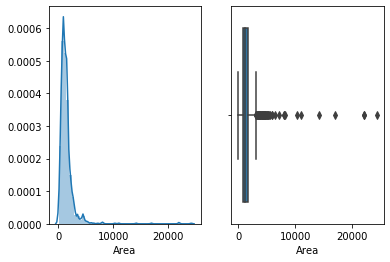

In [84]:
plt.figure(1)
plt.subplot(1,2,1)
sns.distplot(House_data['Area'])
plt.subplot(1,2,2)
sns.boxplot(House_data['Area'])

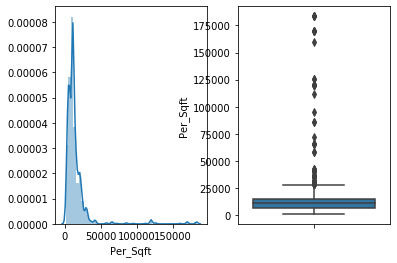

In [105]:
plt.figure(1)
plt.subplot(1,2,1)
sns.distplot(House_data['Per_Sqft'])
plt.subplot(1,2,2)
sns.boxplot(House_data['Per_Sqft'], orient="v")

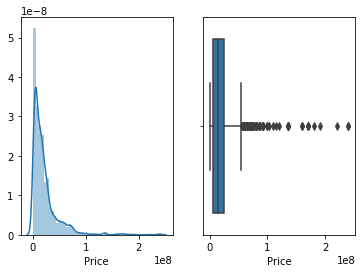

In [86]:
plt.figure(1)
plt.subplot(1,2,1)
sns.distplot(House_data['Price'])
plt.subplot(1,2,2)
sns.boxplot(House_data['Price'])

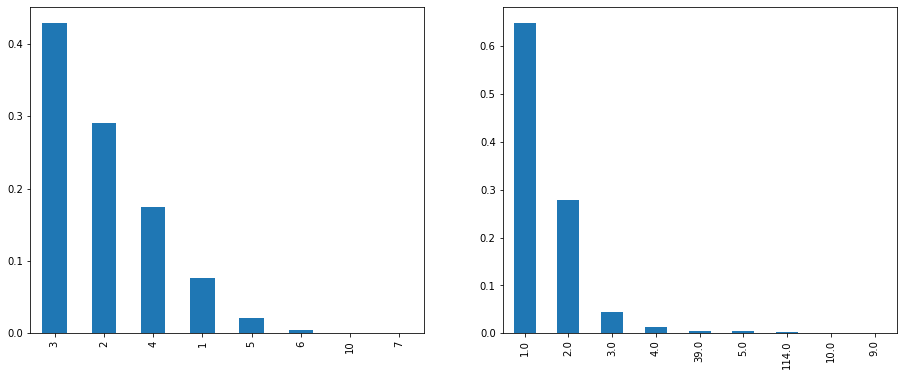

In [99]:
#House_data['BHK']=House_data['BHK'].value_counts()
#sns.barplot(House_data['BHK'].value_counts(normalize=True), orient="v")
plt.figure(1)
plt.subplot(1,3,1)
House_data['BHK'].value_counts(normalize=True).plot.bar(figsize=(24,6))
plt.subplot(1, 3, 2)
House_data['Parking'].value_counts(normalize=True).plot.bar()

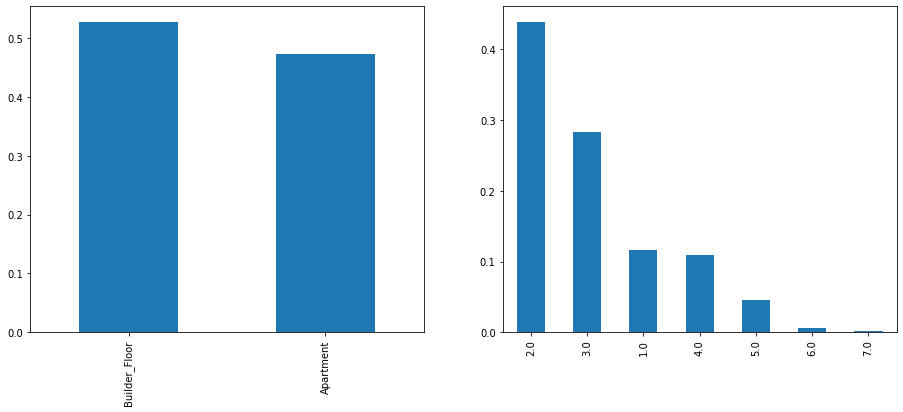

In [100]:
plt.figure(1)
plt.subplot(1,3,1)
House_data['Type'].value_counts(normalize=True).plot.bar(figsize=(24,6))
plt.subplot(1, 3, 2)
House_data['Bathroom'].value_counts(normalize=True).plot.bar()

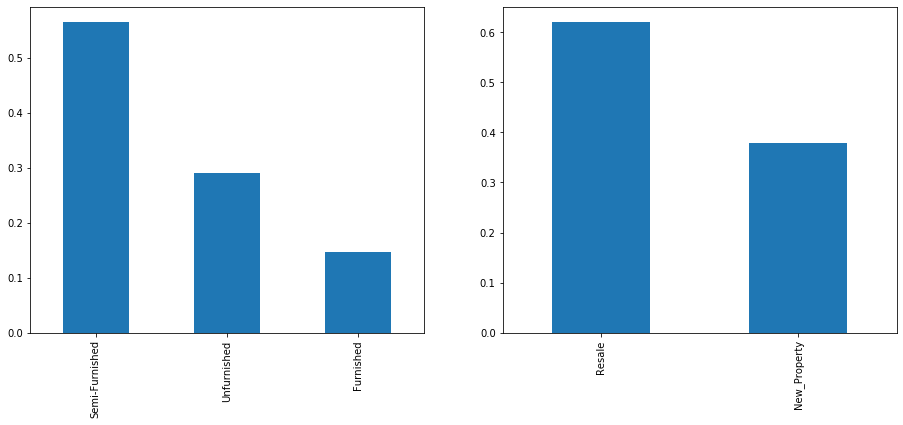

In [102]:
plt.figure(1)
plt.subplot(1,3,1)
House_data['Furnishing'].value_counts(normalize=True).plot.bar(figsize=(24,6))
plt.subplot(1, 3, 2)
House_data['Transaction'].value_counts(normalize=True).plot.bar()

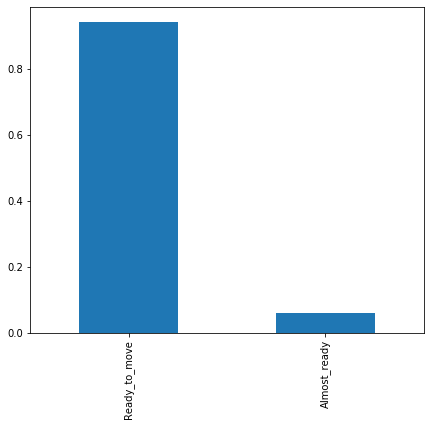

In [103]:
plt.figure(1)
plt.subplot(1,3,1)
House_data['Status'].value_counts(normalize=True).plot.bar(figsize=(24,6))
#plt.subplot(1, 3, 2)
#House_data['Parking'].value_counts(normalize=True).plot.bar()

#Missing Value treatment

In [104]:
House_data['Per_Sqft'] = House_data['Per_Sqft'].fillna(value=House_data['Per_Sqft'].median())

In [107]:
House_data['Parking'] = House_data['Parking'].fillna(value=House_data['Parking'].median())

In [108]:
House_data['Bathroom'] = House_data['Bathroom'].fillna(value=House_data['Bathroom'].median())

In [121]:
House_data['Furnishing'] = House_data['Furnishing'].fillna(value=House_data['Furnishing'].mode()[0])

In [122]:
House_data['Type'] = House_data['Type'].fillna(value=House_data['Type'].mode()[0])

#Bivariate Analysis

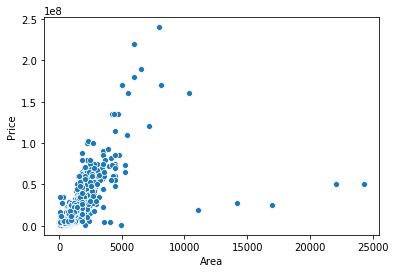

In [113]:
sns.scatterplot(x='Area', y='Price', data=House_data)

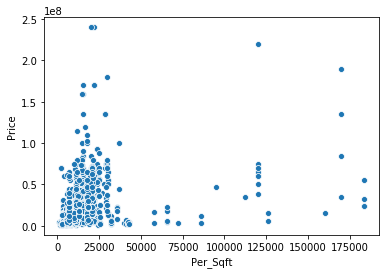

In [114]:
sns.scatterplot(x='Per_Sqft', y='Price', data=House_data)

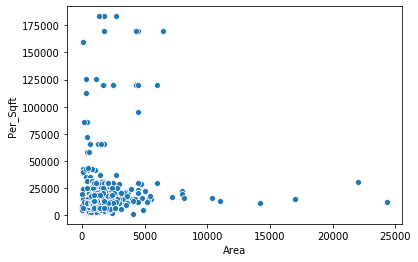

In [115]:
sns.scatterplot(x='Area', y='Per_Sqft', data=House_data)

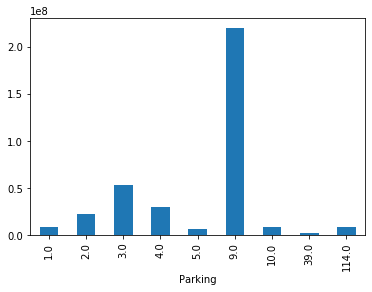

In [128]:
House_data.groupby('Parking')['Price'].median().plot.bar()

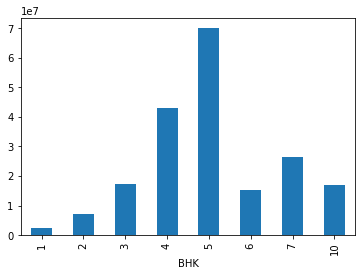

In [129]:
House_data.groupby('BHK')['Price'].median().plot.bar()

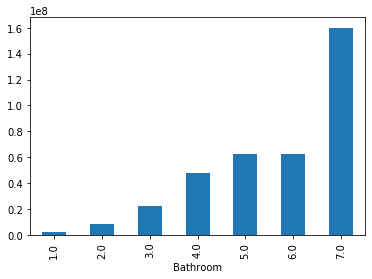

In [130]:
House_data.groupby('Bathroom')['Price'].median().plot.bar()

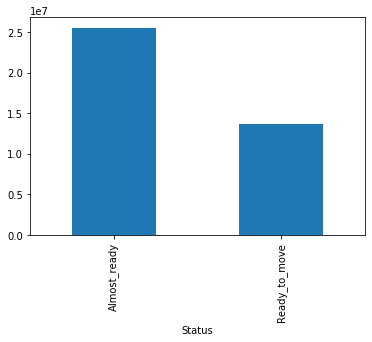

In [131]:
House_data.groupby('Status')['Price'].median().plot.bar()

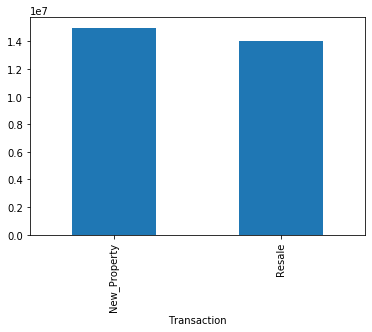

In [132]:
House_data.groupby('Transaction')['Price'].median().plot.bar()

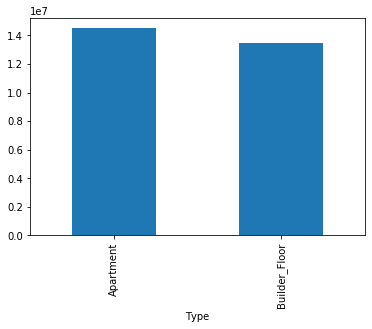

In [133]:
House_data.groupby('Type')['Price'].median().plot.bar()

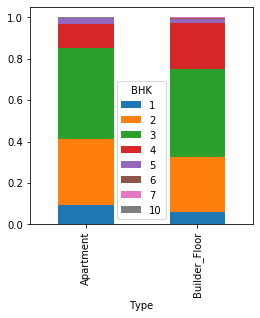

In [135]:
Type=pd.crosstab(House_data['Type'],House_data['BHK']) 
Type.div(Type.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))